In [1]:
plotHeight <- 6
options(repr.plot.width=10, repr.plot.height=plotHeight)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
incidents <- read.csv('../data/processed/master-incidents.csv', stringsAsFactors=FALSE) %>% 
    mutate(
        Date = as.Date(BeginDateTime)
    )
head(incidents)

Long,Lat,PublicAddress,CaseNumber,Precinct,ReportedDateTime,BeginDateTime,Offense,Description,UCRCode,GBSID,CenterLong,CenterLat,X,Y,Neighborhood,Date
<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
-93.30444,44.99577,0016XX MORGAN AVE N,MP2018216327,4,2018-06-30T08:09:00.000Z,2018-06-30T12:10:00.000Z,DASLT2,2ND DEG DOMES ASLT,5,22230,-93.30445,44.99577,-10386603,5620856,WILLARD - HAY,2018-06-30
-93.24994,44.95007,,MP2018216362,3,2018-06-30T08:00:00.000Z,2018-06-30T03:50:00.000Z,ROBPER,ROBBERY OF PERSON,4,NA,-93.24995,44.95007,-10380536,5613664,EAST PHILLIPS,2018-06-30
-93.29560,45.02127,0036XX FREMONT AVE N,MP2018216366,4,2018-06-30T12:01:00.000Z,2018-06-30T00:00:00.000Z,BURGD,BURGLARY OF DWELLING,6,10022,-93.29560,45.02127,-10385619,5624870,FOLWELL,2018-06-30
-93.28721,45.01295,0006XX LOWRY AVE N,MP2018216408,4,2018-06-30T14:03:00.000Z,2018-06-29T36:40:00.000Z,AUTOTH,AUTOMOBILE THEFT,8,25904,-93.28722,45.01296,-10384685,5623561,HAWTHORNE,2018-06-29
-93.29307,45.01763,0034XX DUPONT AVE N,MP2018216419,4,2018-06-30T11:25:00.000Z,2018-06-30T03:20:00.000Z,BURGD,BURGLARY OF DWELLING,6,10418,-93.29307,45.01763,-10385337,5624298,MCKINLEY,2018-06-30
-93.26036,44.96392,0009XX 19TH ST E,MP2018216438,3,2018-06-30T13:56:00.000Z,2018-06-29T25:30:00.000Z,BURGD,BURGLARY OF DWELLING,6,18708,-93.26037,44.96393,-10381696,5615844,VENTURA VILLAGE,2018-06-29


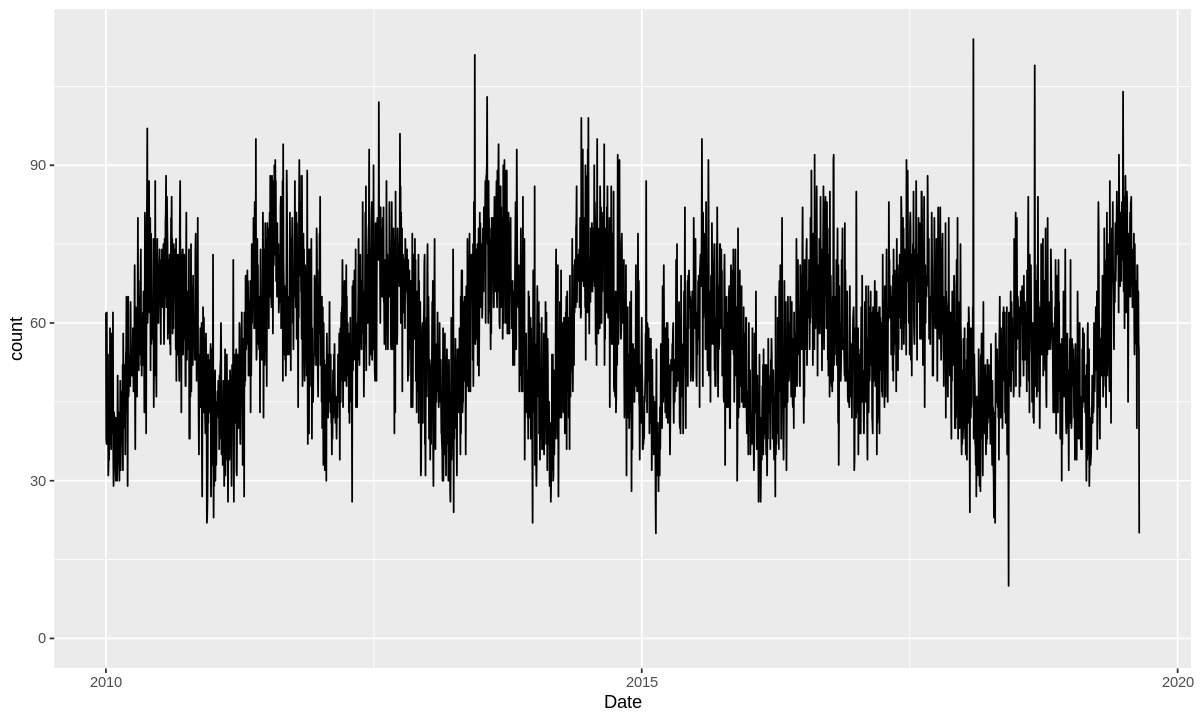

In [4]:
ggplot(incidents) +
    geom_line(aes(Date), stat='count') +
    expand_limits(y=0)

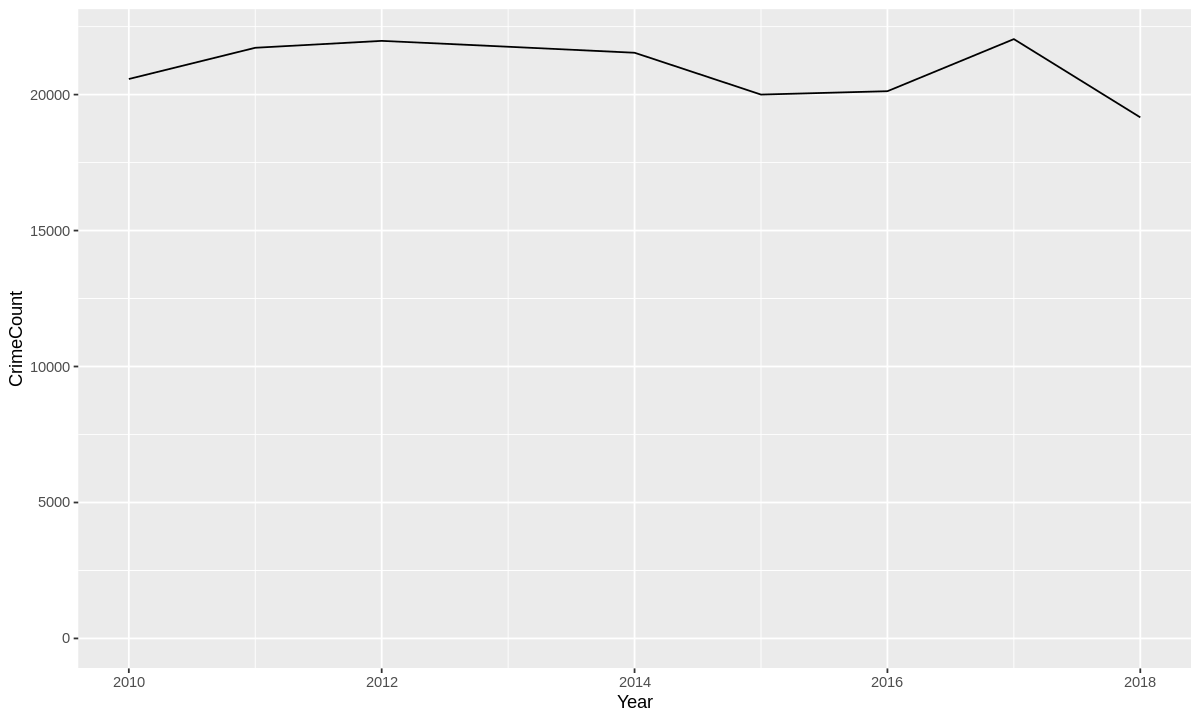

In [5]:
incidents %>% 
    mutate(Year = as.numeric(str_sub(Date, start=1, end=4))) %>% 
    count(Year) %>% 
    rename(CrimeCount = n) %>% 
    filter(Year != 2019) %>% 
ggplot() +
    geom_line(aes(Year, CrimeCount)) +
    expand_limits(y=0)

Warning message:
“Removed 1 rows containing missing values (geom_path).”

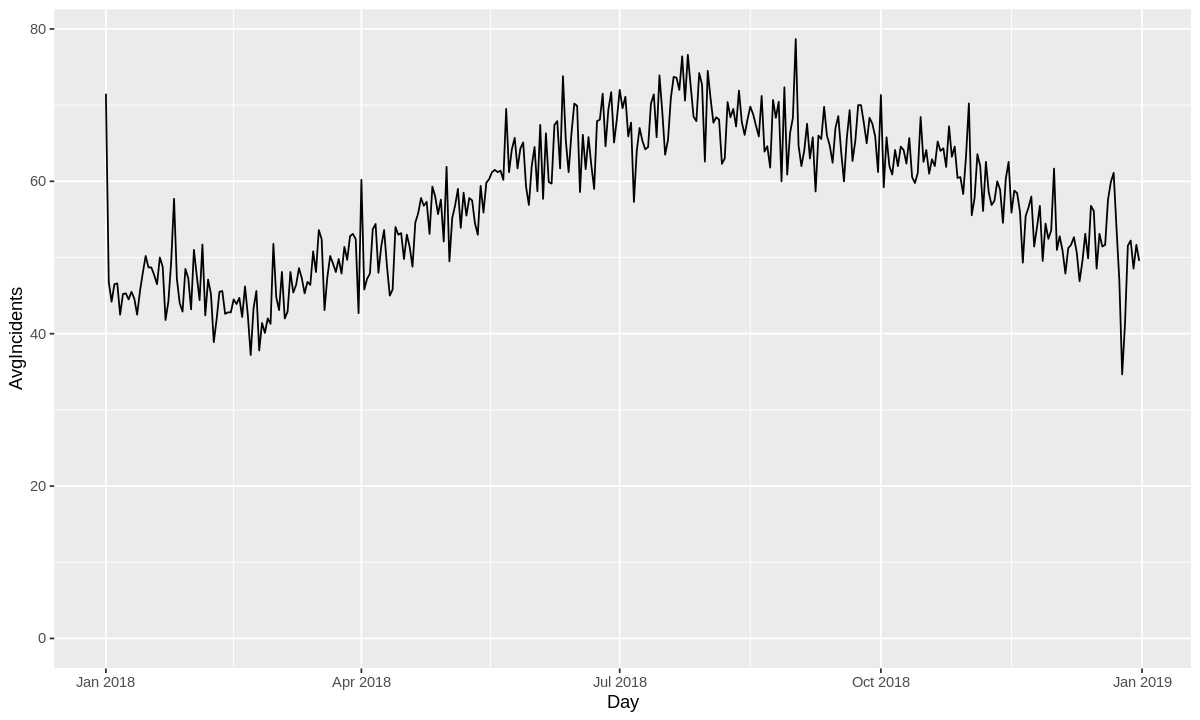

In [6]:
incidents %>% 
    count(Date) %>% 
    mutate(Day = str_sub(Date, 6, 10)) %>% 
    group_by(Day) %>% 
    summarise(AvgIncidents=mean(n)) %>% 
    mutate(Day = as.Date(paste0('2018-', Day))) %>% # 2018 for simplicity
ggplot() +
    geom_line(aes(Day, AvgIncidents)) +
    expand_limits(y=0)

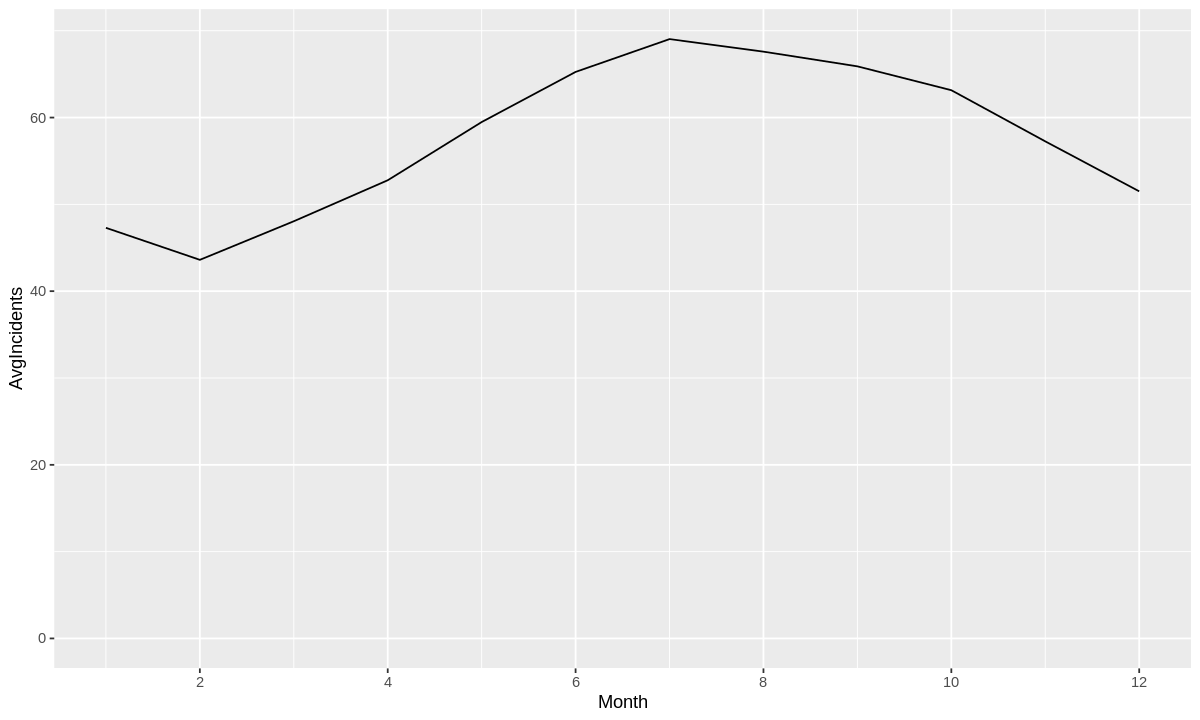

In [7]:
incidents %>% 
    count(Date) %>% 
    mutate(Month = as.numeric(str_sub(Date, 6, 7))) %>% 
    group_by(Month) %>% 
    summarise(AvgIncidents = mean(n)) %>% 
ggplot() +
    geom_line(aes(Month, AvgIncidents)) +
    expand_limits(y=0) +
    scale_x_continuous(limits=c(1, 12), breaks=seq(2,12,2))

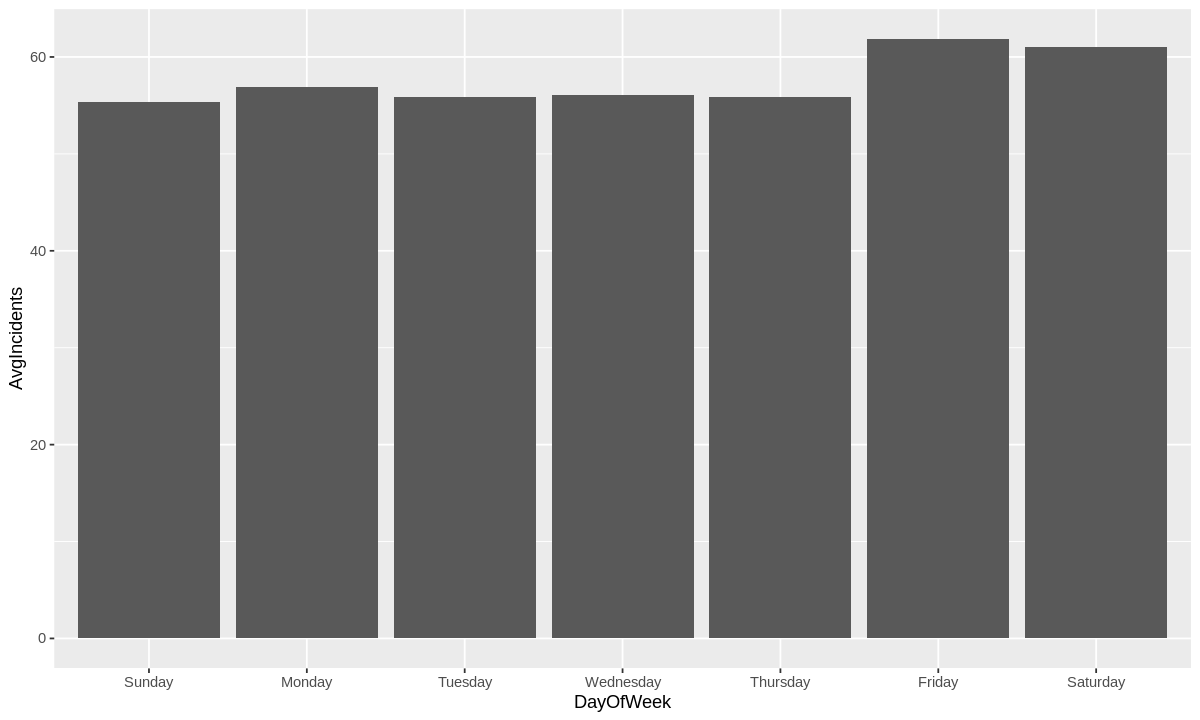

In [8]:
incidents %>% 
    count(Date) %>% 
    mutate(DayOfWeek = factor(weekdays(Date), levels=c('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                                      'Friday', 'Saturday'))) %>% 
    group_by(DayOfWeek) %>% 
    summarise(AvgIncidents = mean(n)) %>% 
ggplot() +
    geom_bar(aes(DayOfWeek, AvgIncidents), stat='identity')

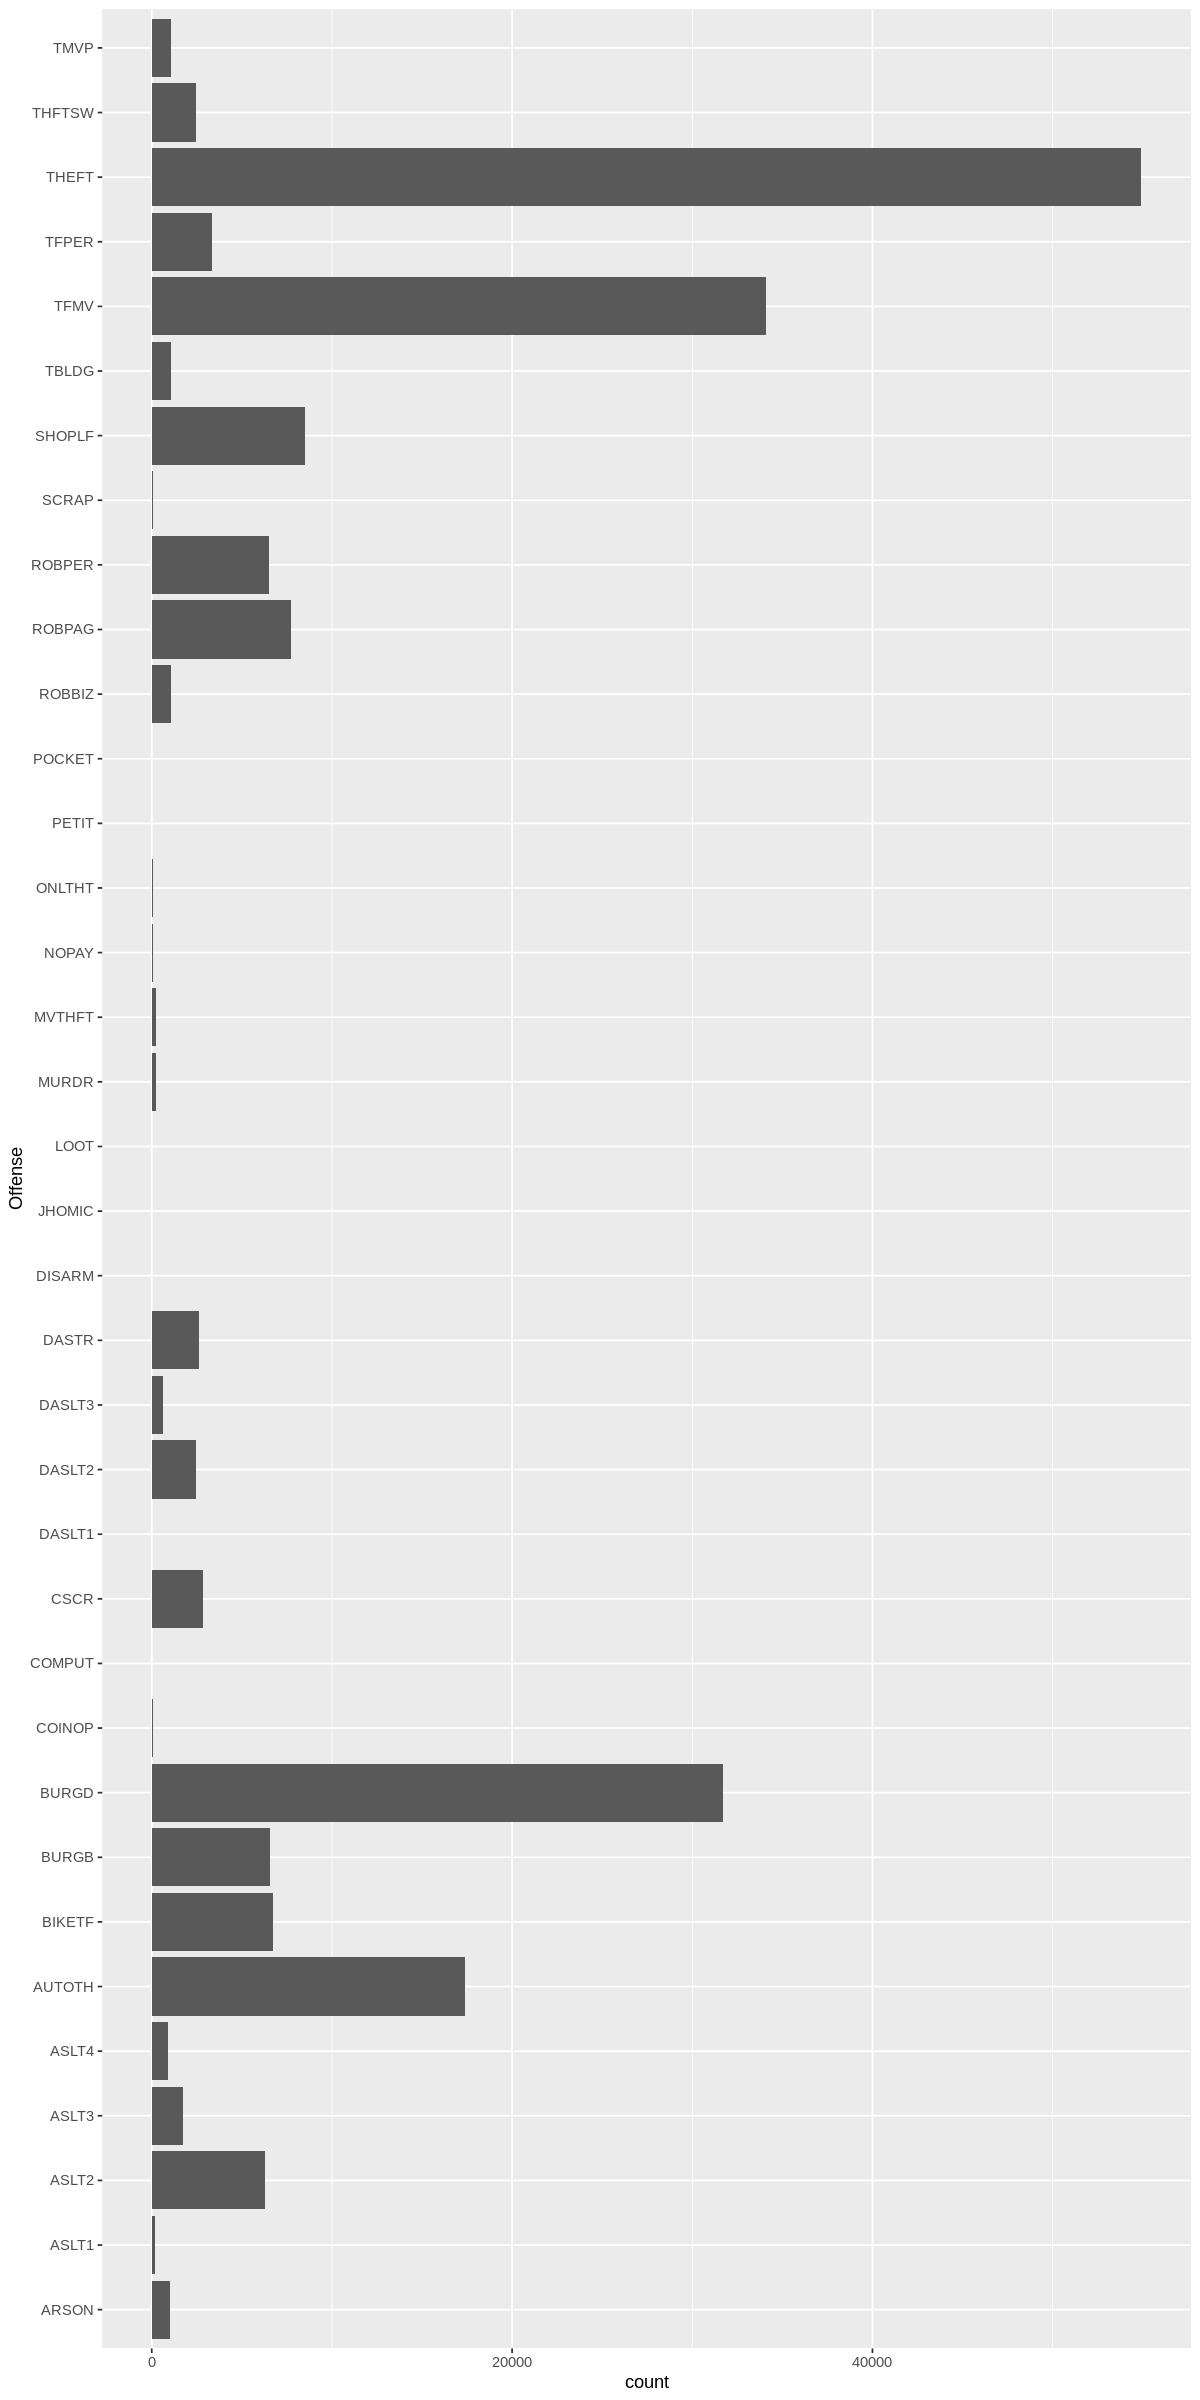

In [9]:
options(repr.plot.width=10, repr.plot.height=20)
ggplot(incidents) +
    geom_bar(aes(Offense)) +
    coord_flip()
options(repr.plot.width=10, repr.plot.height=plotHeight)

In [10]:
numMonthIncidents <- incidents %>% 
    count(Date) %>% 
    rename(Incidents=n) %>% 
    mutate(Month = as.numeric(str_sub(Date, 6, 7)))
monthLm <- lm(Incidents~poly(Month,2), data=numMonthIncidents)
summary(monthLm)


Call:
lm(formula = Incidents ~ poly(Month, 2), data = numMonthIncidents)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.684  -7.684  -0.664   7.073  66.962 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       57.569      0.192  299.78   <2e-16 ***
poly(Month, 2)1  269.788     11.397   23.67   <2e-16 ***
poly(Month, 2)2 -361.533     11.397  -31.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.4 on 3519 degrees of freedom
Multiple R-squared:  0.3081,	Adjusted R-squared:  0.3077 
F-statistic: 783.3 on 2 and 3519 DF,  p-value: < 2.2e-16


In [11]:
factorMonthIncidents <- incidents %>% 
    count(Date) %>% 
    rename(Incidents=n) %>% 
    mutate(Month = factor(str_sub(Date, 6, 7)))
factorMonthLm <- lm(Incidents~Month, data=factorMonthIncidents)
summary(factorMonthLm)


Call:
lm(formula = Incidents ~ Month, data = factorMonthIncidents)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.257  -7.297  -0.502   6.826  70.390 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.2968     0.6141  77.021  < 2e-16 ***
Month02      -3.6868     0.8897  -4.144 3.50e-05 ***
Month03       0.7581     0.8684   0.873    0.383    
Month04       5.4799     0.8756   6.258 4.37e-10 ***
Month05      12.1839     0.8684  14.030  < 2e-16 ***
Month06      17.9599     0.8756  20.511  < 2e-16 ***
Month07      21.7387     0.8684  25.032  < 2e-16 ***
Month08      20.2926     0.8742  23.214  < 2e-16 ***
Month09      18.5995     0.9000  20.666  < 2e-16 ***
Month10      15.8502     0.8922  17.765  < 2e-16 ***
Month11       9.9588     0.9000  11.065  < 2e-16 ***
Month12       4.2050     0.8922   4.713 2.54e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.81 on 3510 degrees of freedom
Multiple

In [12]:
monthAnova <- aov(Incidents~Month, data=factorMonthIncidents)
summary(monthAnova)

              Df Sum Sq Mean Sq F value Pr(>F)    
Month         11 250256   22751   194.6 <2e-16 ***
Residuals   3510 410307     117                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [13]:
sort(unique(incidents$Neighborhood))

[1] ""                                 "ARMATAGE"                        
 [3] "AUDUBON PARK"                     "BANCROFT"                        
 [5] "BELTRAMI"                         "BOTTINEAU"                       
 [7] "BRYANT"                           "BRYN - MAWR"                     
 [9] "CAMDEN INDUSTRIAL"                "CARAG"                           
[11] "CEDAR - ISLES - DEAN"             "CEDAR RIVERSIDE"                 
[13] "CENTRAL"                          "CLEVELAND"                       
[15] "COLUMBIA PARK"                    "COMO"                            
[17] "COOPER"                           "CORCORAN"                        
[19] "DIAMOND LAKE"                     "DOWNTOWN EAST"                   
[21] "DOWNTOWN WEST"                    "EAST HARRIET"                    
[23] "EAST ISLES"                       "EAST PHILLIPS"                   
[25] "ECCO"                             "ELLIOT PARK"                     
[27] "ERICSSON"                         "FIELD"                           
[29] "FOLWELL"                          "FULTON"                          
[31] "HALE"                             "HARRISON"                        
[33] "HAWTHORNE"                        "HIAWATHA"                        
[35] "HOLLAND"                          "HOWE"                            
[37] "HUMBOLDT INDUSTRIAL AREA"         "JORDAN"                          
[39] "KEEWAYDIN"                        "KENNY"                           
[41] "KENWOOD"                          "KING FIELD"                      
[43] "LIND - BOHANON"                   "LINDEN HILLS"                    
[45] "LOGAN PARK"                       "LONGFELLOW"                      
[47] "LORING PARK"                      "LOWRY HILL"                      
[49] "LOWRY HILL EAST"                  "LYNDALE"                         
[51] "LYNNHURST"                        "MARCY HOLMES"                    
[53] "MARSHALL TERRACE"                 "MCKINLEY"                        
[55] "MID - CITY INDUSTRIAL"            "MIDTOWN PHILLIPS"                
[57] "MINNEHAHA"                        "MORRIS PARK"                     
[59] "NEAR - NORTH"                     "NICOLLET ISLAND - EAST BANK"     
[61] "NORTH LOOP"                       "NORTHEAST PARK"                  
[63] "NORTHROP"                         "PAGE"                            
[65] "PHILLIPS WEST"                    "POWDERHORN PARK"                 
[67] "PROSPECT PARK - EAST RIVER ROAD"  "REGINA"                          
[69] "SEWARD"                           "SHERIDAN"                        
[71] "SHINGLE CREEK"                    "ST. ANTHONY EAST"                
[73] "ST. ANTHONY WEST"                 "STANDISH"                        
[75] "STEVEN'S SQUARE - LORING HEIGHTS" "STEVENS SQUARE - LORING HEIGHTS" 
[77] "SUMNER - GLENWOOD"                "TANGLETOWN"                      
[79] "UNIVERSITY OF MINNESOTA"          "VENTURA VILLAGE"                 
[81] "VICTORY"                          "WAITE PARK"                      
[83] "WEBBER - CAMDEN"                  "WENONAH"                         
[85] "WEST CALHOUN"                     "WHITTIER"                        
[87] "WILLARD - HAY"                    "WINDOM"                          
[89] "WINDOM PARK"